# Email Spam Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv("mail_data.csv")


In [5]:
df.shape

(5572, 2)

# Data Cleaning

In [8]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
df.rename(columns={'Category':'target','Message': 'text'},inplace='True')

In [14]:
df.sample(5)

,target,text
702,ham,"Sorry, I'll call later"
284,ham,Okie...
4767,ham,Whens your radio show?
4294,ham,You best watch what you say cause I get drunk ...
3614,ham,Depends on individual lor e hair dresser say p...


In [16]:
#label encoder, to convert spam/ham values to 0 and 1

encoder = LabelEncoder()
encoder.fit_transform(df['target'])
df['target'] = encoder.fit_transform(df['target'])

In [18]:
#check for missing and duplicated values

df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.duplicated().sum()

415

In [22]:
df= df.drop_duplicates(keep= 'first')

In [24]:
df.shape

(5157, 2)

# EDA

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

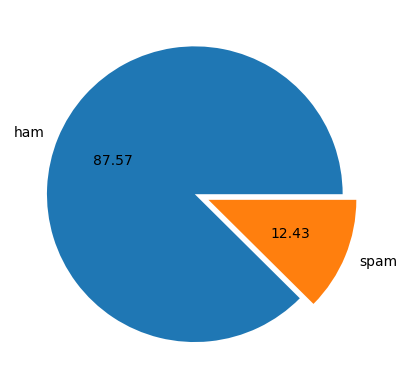

In [31]:
plt.pie(df['target'].value_counts(),labels= ['ham','spam'],autopct = "%0.2f", explode = (0,0.1))
plt.show()

In [33]:
# we conclude that data is slightly imbalanced

#we make some new columns : no. of characters, no. of words, no. of sentences 
#natural language toolkit
import nltk

In [39]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5157, dtype: object

In [41]:
#an extra column: number of characters is created

df['num_characters']= df['text'].apply(len)

/tmp/ipykernel_7647/2594513136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


In [43]:
df.shape


(5157, 3)

In [45]:
#another extra column, for number of words using nlk

df['num_words']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

/tmp/ipykernel_7647/1441936696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))


In [47]:
df.shape

(5157, 4)

In [49]:
#extra column for no. of sentences
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipykernel_7647/561558883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [51]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
#statistical analysis of these columns

df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
#ham messages

df[df['target']== 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
#spam

df[df['target']== 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

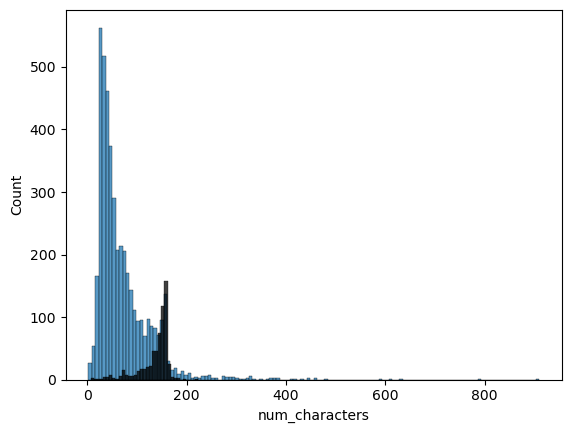

In [59]:
#histogram for the no. of characters present in a message
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color = 'black')

spam messages are more descriptive

<Axes: xlabel='num_sent', ylabel='Count'>

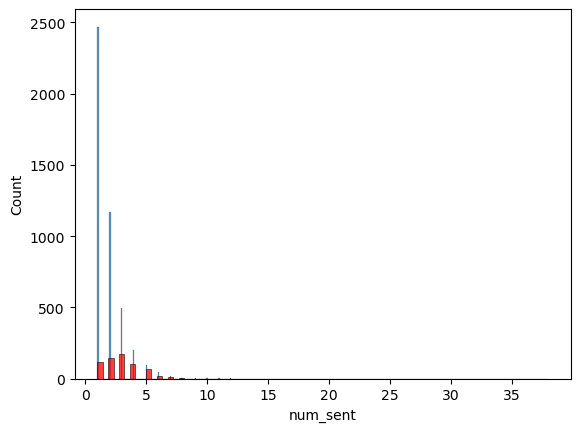

In [62]:
sns.histplot(df[df['target'] ==0]['num_sent'])
sns.histplot(df[df['target'] ==1]['num_sent'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

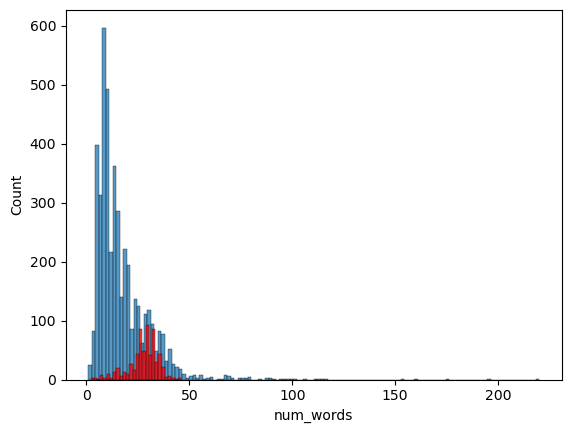

In [64]:
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color = 'red')

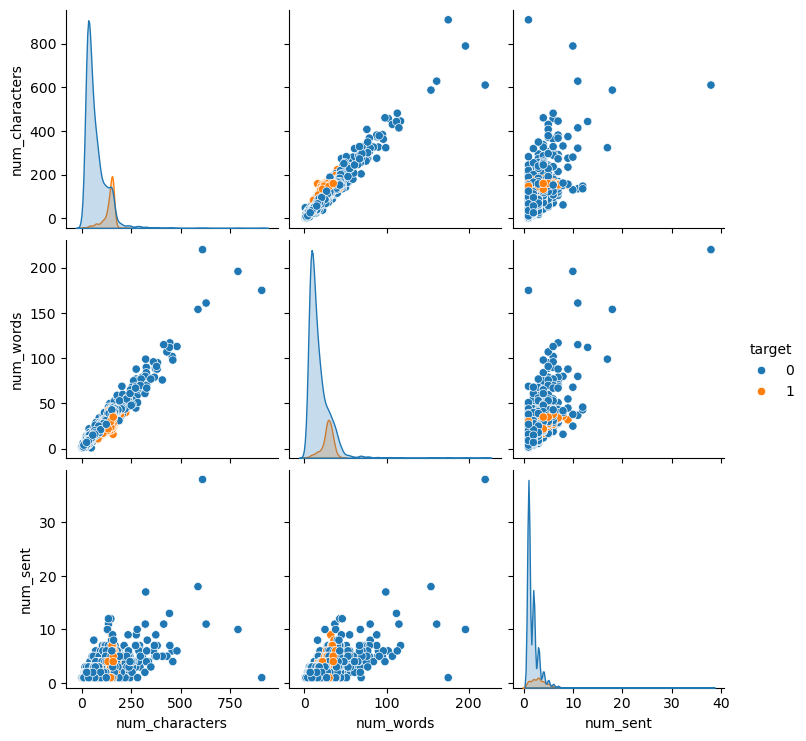

In [66]:
sns.pairplot(df,hue = 'target')

obs: data contains outliers too

In [69]:
# creating a dataset which only contains numerical data, by dropping the column containing categorical data.
n_df= df.drop('text', axis = 1)

In [71]:
n_df.head()

,target,num_characters,num_words,num_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [73]:
n_df.corr()

,target,num_characters,num_words,num_sent
target,1.000000,0.374409,0.255968,0.259023
num_characters,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_sent,0.259023,0.622428,0.679396,1.000000


<Axes: >

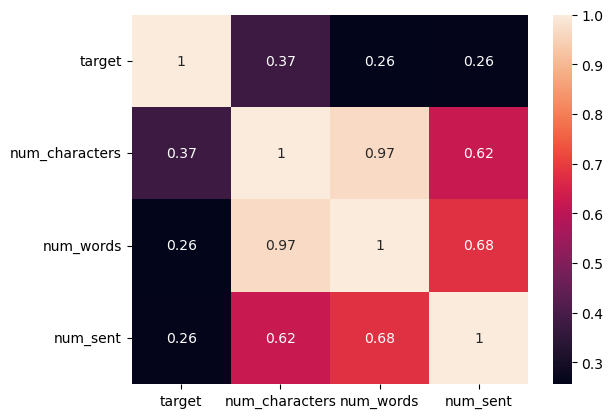

In [75]:
sns.heatmap(n_df.corr(),annot= True)

following this correlation, the most dependent feature is num_characters

# Data Preprocessing

In [79]:
# in actual sense text preprocessing:
def transform_text(text):

    #convert the whole text to lower case
    text = text.lower()

    #tokenization of the converted text
    text = nltk.word_tokenize(text)

    #remove the intended SPECIAL CHARACTERS in the text, since they actually don't have any meaning in the prediction.

    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]

    # Remove stop words and punctuation marks.
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    #stemming:

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [81]:
# STOP WORDS
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/tarang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [83]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [87]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [89]:
df['transformed_text']= df['text'].apply(transform_text)

/tmp/ipykernel_7647/3705489216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']= df['text'].apply(transform_text)


In [93]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
# create a wordcloud

from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')


In [97]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ""))

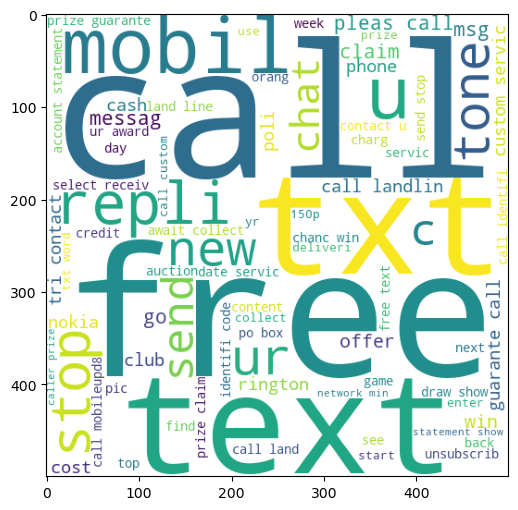

In [99]:
#It will show all the words which appear in a spam message

plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

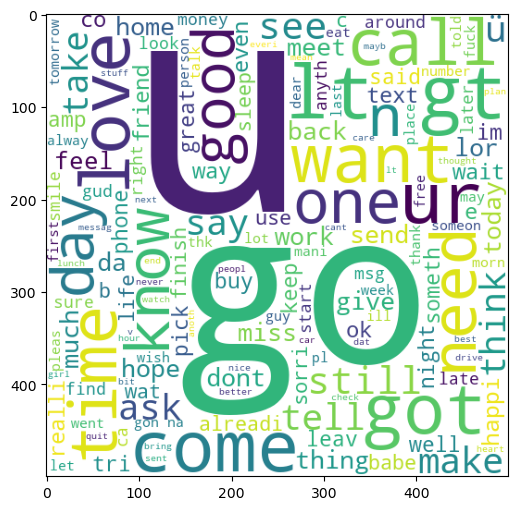

In [101]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ""))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [102]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [105]:
# all the spam entries

df[df['target'] == 1]

,target,text,num_characters,num_words,num_sent,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [107]:
#text appearing in spam messages

df[df['target'] == 1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 641, dtype: object

In [109]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [111]:
#it is a list of all the words in spam messages
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [113]:
len(spam_corpus)

9781

In [115]:
# counts the no. of times a particular word appears
from collections import Counter
Counter(spam_corpus)

Counter({'call': 311,
         'free': 186,
         '2': 154,
         'txt': 139,
         'text': 122,
         'ur': 119,
         'u': 115,
         'mobil': 110,
         'stop': 108,
         'repli': 103,
         'claim': 96,
         '4': 95,
         'prize': 78,
         'get': 73,
         'new': 64,
         'servic': 64,
         'send': 60,
         'tone': 59,
         'urgent': 56,
         'award': 55,
         'nokia': 54,
         'contact': 53,
         'phone': 52,
         'cash': 50,
         'pleas': 50,
         'week': 48,
         'win': 46,
         'min': 45,
         'c': 43,
         'guarante': 42,
         'collect': 42,
         'messag': 41,
         'per': 40,
         'custom': 39,
         'chat': 37,
         'tri': 36,
         'msg': 35,
         'number': 35,
         'cs': 34,
         'draw': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'show': 32,
         'want': 32,
         'go': 32,
         'receiv': 3

In [117]:
#top 30 words
spam_counts = Counter(spam_corpus).most_common(30)
data = pd.DataFrame(spam_counts, columns=['Word', 'Count'])

In [119]:
data.sample(5)

,Word,Count
1,free,186
11,4,95
5,ur,119
23,cash,50
19,award,55


/tmp/ipykernel_7647/1433039196.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='Word', y='Count', data=data, palette = 'husl')


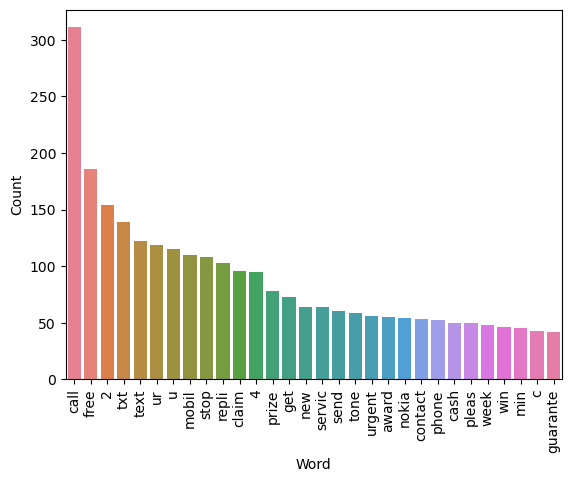

In [121]:
sns.barplot(x ='Word', y='Count', data=data, palette = 'husl')
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

## 1.Naive Bayes

In [125]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
#we have 2 categorical variables, so the first step is to convert the text variables into vectors by text vectorization using bag of words.
from sklearn.feature_extraction. text import CountVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [129]:
#X = cv.fit_transform(df["transformed_text"]).toarray()
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [131]:
X.shape

(5157, 6781)

In [133]:
y = df['target'].values

In [135]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [137]:
#therefore X and y are 2 separate arrays now

from sklearn.model_selection import train_test_split


In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [140]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [143]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)

In [146]:
# for gnb:-

print("Accuracy: ",accuracy_score(y_test,y_pred1))
print("Confusion Marix: ",confusion_matrix(y_test,y_pred1))
print("Precision: ",precision_score(y_test,y_pred1))

Accuracy:  0.8691860465116279
Confusion Marix:  [[787 118]
 [ 17 110]]
Precision:  0.4824561403508772


In [149]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)

In [151]:
# for multinomial nb:-

print("Accuracy: ",accuracy_score(y_test,y_pred2))
print("Confusion Marix: ",confusion_matrix(y_test,y_pred2))
print("Precision: ",precision_score(y_test,y_pred2))

Accuracy:  0.9612403100775194
Confusion Marix:  [[905   0]
 [ 40  87]]
Precision:  1.0


In [153]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)

In [155]:
# for bernoullinb:-

print("Accuracy: ",accuracy_score(y_test,y_pred3))
print("Confusion Marix: ",confusion_matrix(y_test,y_pred3))
print("Precision: ",precision_score(y_test,y_pred3))

Accuracy:  0.9718992248062015
Confusion Marix:  [[902   3]
 [ 26 101]]
Precision:  0.9711538461538461


bnb has the best accuracy but mnb has the best precision

Since the data is imbalanced, mnb with tfidf becomes an accurate model for prediction

## 2. Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') 

## 3.Support Vector Classifier

In [163]:

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)


## 4. Decision Tree 

In [166]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)


## 5. KNN

In [169]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

# 6. Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=2)


## 7.Boosting

In [175]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [177]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()


In [179]:
# a dictionery to store the model elements

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [181]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [183]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    c_accuracy,c_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",c_accuracy)
    print("Precision - ",c_precision)
    
    accuracy_scores.append(c_accuracy)
    precision_scores.append(c_precision)

For  SVC
Accuracy -  0.9718992248062015
Precision -  0.9803921568627451
For  KN
Accuracy -  0.9040697674418605
Precision -  1.0
For  NB
Accuracy -  0.9612403100775194
Precision -  1.0
For  DT
Accuracy -  0.935077519379845
Precision -  0.8191489361702128
For  LR
Accuracy -  0.9515503875968992
Precision -  0.9230769230769231
For  RF
Accuracy -  0.9670542635658915
Precision -  1.0


/home/tarang/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9631782945736435
Precision -  0.9587628865979382
For  BgC
Accuracy -  0.9622093023255814
Precision -  0.9074074074074074
For  ETC
Accuracy -  0.9738372093023255
Precision -  1.0
For  GBDT
Accuracy -  0.9534883720930233
Precision -  0.9759036144578314
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9626168224299065


In [184]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [187]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904070,1.000000
2,NB,0.961240,1.000000
5,RF,0.967054,1.000000
8,ETC,0.973837,1.000000
0,SVC,0.971899,0.980392
9,GBDT,0.953488,0.975904
10,xgb,0.972868,0.962617
6,AdaBoost,0.963178,0.958763
4,LR,0.951550,0.923077
7,BgC,0.962209,0.907407


on the basis of the precision values obtained from each model we infer that Naive-bayes, RandomForest, Extra tree classifier and svm are the best models

# Voting tree classifier

In [191]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [193]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [195]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796511627906976
Precision 1.0


so in this case the voting classifier made up of SVC, Multinomial Naive Bayes and ExtraTreeClassfier performs better